In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = './data/rainfall_train.csv'
rainfall = pd.read_csv(file_path)
rainfall = rainfall.iloc[:, 1:]
rainfall.columns = rainfall.columns.str.replace('rainfall_train.', '')
rainfall

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,A,5,1,9,STN001,3,A,5,1,12,...,0,0,0,0,0,0,0,0,0.0,0
1,A,5,1,9,STN001,6,A,5,1,15,...,0,0,0,0,0,0,0,0,0.0,0
2,A,5,1,9,STN001,9,A,5,1,18,...,0,0,0,0,0,0,0,0,0.0,0
3,A,5,1,9,STN001,12,A,5,1,21,...,0,0,0,0,0,0,0,0,0.0,0
4,A,5,1,9,STN001,15,A,5,2,0,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,C,9,30,21,STN020,228,C,10,10,9,...,7,2,2,0,0,0,0,0,0.5,3
1457248,C,9,30,21,STN020,231,C,10,10,12,...,9,5,3,1,0,0,0,0,0.0,0
1457249,C,9,30,21,STN020,234,C,10,10,15,...,9,5,3,1,0,0,0,0,1.9,4
1457250,C,9,30,21,STN020,237,C,10,10,18,...,6,4,2,2,0,0,0,0,1.9,4


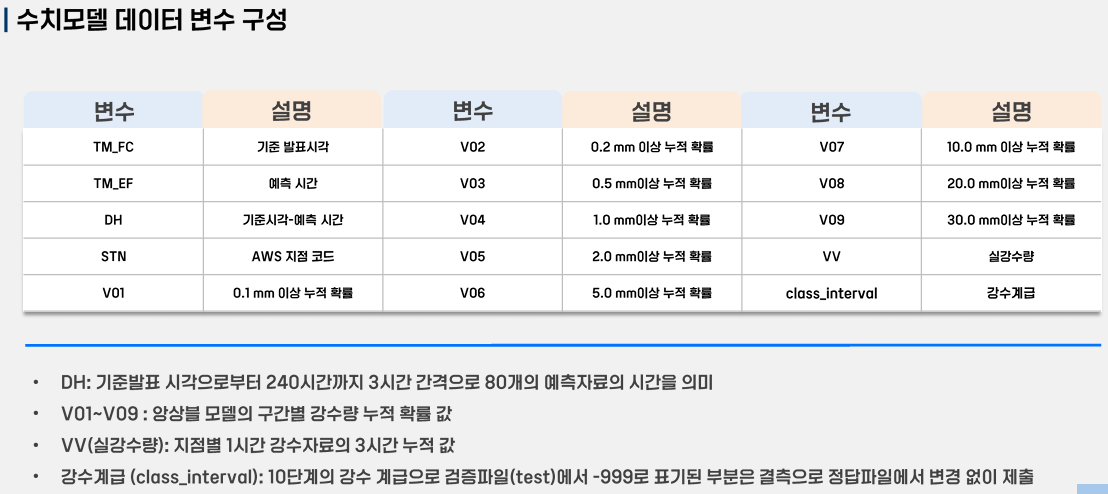

# 데이터 확인

In [40]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457252 entries, 0 to 1457251
Data columns (total 21 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   fc_year         1457252 non-null  object 
 1   fc_month        1457252 non-null  int64  
 2   fc_day          1457252 non-null  int64  
 3   fc_hour         1457252 non-null  int64  
 4   stn4contest     1457252 non-null  object 
 5   dh              1457252 non-null  int64  
 6   ef_year         1457252 non-null  object 
 7   ef_month        1457252 non-null  int64  
 8   ef_day          1457252 non-null  int64  
 9   ef_hour         1457252 non-null  int64  
 10  v01             1457252 non-null  int64  
 11  v02             1457252 non-null  int64  
 12  v03             1457252 non-null  int64  
 13  v04             1457252 non-null  int64  
 14  v05             1457252 non-null  int64  
 15  v06             1457252 non-null  int64  
 16  v07             1457252 non-null  in

In [6]:
rainfall[rainfall['dh'] == 240]

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
79,A,5,1,9,STN001,240,A,5,11,9,...,12,12,5,1,0,0,0,0,0.0,0
159,A,5,1,21,STN001,240,A,5,11,21,...,8,4,2,2,0,0,0,0,0.0,0
239,A,5,2,9,STN001,240,A,5,12,9,...,7,6,5,1,0,0,0,0,0.0,0
319,A,5,2,21,STN001,240,A,5,12,21,...,4,1,0,0,0,0,0,0,0.0,0
399,A,5,3,9,STN001,240,A,5,13,9,...,6,2,2,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456931,C,9,28,21,STN020,240,C,10,8,21,...,4,4,3,2,0,0,0,0,0.0,0
1457011,C,9,29,9,STN020,240,C,10,9,9,...,10,6,5,3,1,0,0,0,1.5,4
1457091,C,9,29,21,STN020,240,C,10,9,21,...,7,5,2,2,0,0,0,0,4.7,5
1457171,C,9,30,9,STN020,240,C,10,10,9,...,9,6,2,1,0,0,0,0,0.5,3


# 시계열 빠진 것 있는지 확인

In [26]:
rainfall.drop_duplicates(subset=['fc_year','fc_month'], keep='last')

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
925163,A,5,31,21,STN020,240,A,6,10,21,...,16,14,11,8,3,0,0,0,3.5,5
929961,A,6,30,21,STN020,240,A,7,10,21,...,54,45,35,27,9,3,0,0,0.0,0
934921,A,7,31,21,STN020,240,A,8,10,21,...,49,37,26,17,5,1,0,0,0.6,3
939881,A,8,31,21,STN020,240,A,9,10,21,...,15,10,5,3,2,1,0,0,0.0,0
944679,A,9,30,21,STN020,240,A,10,10,21,...,5,2,2,0,0,0,0,0,0.0,0
949159,B,5,31,21,STN020,240,B,6,10,21,...,11,8,6,6,2,2,1,0,0.5,3
953959,B,6,30,21,STN020,240,B,7,10,21,...,60,46,35,22,4,1,0,0,0.0,0
958919,B,7,31,21,STN020,240,B,8,10,21,...,32,22,16,7,3,2,2,2,0.0,0
963879,B,8,31,21,STN020,240,B,9,10,21,...,22,17,12,6,3,0,0,0,0.0,0
968679,B,9,30,21,STN020,240,B,10,10,21,...,34,27,14,7,5,2,0,0,0.5,3


In [37]:
temp = rainfall.drop_duplicates(subset=['fc_year','fc_month','fc_day', 'fc_hour'], keep='last')
temp[['fc_year','fc_month']].value_counts().sort_index()

fc_year  fc_month
A        5           62
         6           60
         7           62
         8           62
         9           60
B        5           56
         6           60
         7           62
         8           62
         9           60
C        5           62
         6           60
         7           62
         8           62
         9           60
Name: count, dtype: int64

- B년도 5월에 빠진 날짜 있음

# 강수량 측정 장소

In [44]:
rainfall['stn4contest'].unique()

array(['STN001', 'STN002', 'STN003', 'STN004', 'STN005', 'STN006',
       'STN007', 'STN008', 'STN009', 'STN010', 'STN011', 'STN012',
       'STN013', 'STN014', 'STN015', 'STN016', 'STN017', 'STN018',
       'STN019', 'STN020'], dtype=object)

In [45]:
rainfall[rainfall['stn4contest'] == 'STN001']

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
0,A,5,1,9,STN001,3,A,5,1,12,...,0,0,0,0,0,0,0,0,0.0,0
1,A,5,1,9,STN001,6,A,5,1,15,...,0,0,0,0,0,0,0,0,0.0,0
2,A,5,1,9,STN001,9,A,5,1,18,...,0,0,0,0,0,0,0,0,0.0,0
3,A,5,1,9,STN001,12,A,5,1,21,...,0,0,0,0,0,0,0,0,0.0,0
4,A,5,1,9,STN001,15,A,5,2,0,...,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993120,C,9,30,21,STN001,228,C,10,10,9,...,7,3,2,2,1,0,0,0,0.8,3
993121,C,9,30,21,STN001,231,C,10,10,12,...,7,4,4,2,2,0,0,0,0.0,0
993122,C,9,30,21,STN001,234,C,10,10,15,...,7,4,4,2,2,0,0,0,0.4,2
993123,C,9,30,21,STN001,237,C,10,10,18,...,9,7,5,4,2,0,0,0,1.0,4


# 파생변수 생성

In [62]:
rainfall['class_interval'].unique()

array([   0,    4,    6,    5,    7,    1,    3,    2,    8, -999,    9],
      dtype=int64)

In [74]:
#
temp = rainfall.iloc[:, 10:-2]
temp2 = temp.shift(1, axis=1) - temp

# merge
temp = pd.concat([temp, temp2.iloc[:, 1:]], axis=1)
temp = temp.iloc[:, 8:]
temp.columns = [9] + list(range(1,8+1))
temp['vv_pred'] = temp.apply(lambda row: 0 if row.sum() == 0 else row.idxmax(skipna=True), axis=1)
temp

,9,1,2,3,4,5,6,7,8,vv_pred
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1457247,0,2,5,0,2,0,0,0,0,2
1457248,0,4,4,2,2,1,0,0,0,1
1457249,0,4,4,2,2,1,0,0,0,1
1457250,0,2,2,2,0,2,0,0,0,1


In [89]:
temp2 = pd.concat([rainfall.iloc[:,10:-2], temp, rainfall.iloc[:,-2:]], axis=1)
temp2.iloc[1457249:1457249+1, 9:]

,9,1,2,3,4,5,6,7,8,vv_pred,vv,class_interval
1457249,0,4,4,2,2,1,0,0,0,1,1.9,4


In [77]:
temp2 = pd.concat([temp['vv_pred'], rainfall.iloc[:,-2:]], axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(temp2['class_interval'], temp2['vv_pred'])

# 오차 행렬 출력
print(cm)

[[     0   1524   2194   2461    702    439    869    227     70      3
       1]
 [     0 221909 329123 381602  94587  58304 102659  25810   8769    171
     381]
 [     0    173   3640   7588   2475   1963   4337    999    381      1
       5]
 [     0    145   4890  11571   3959   3222   7714   1945    581      9
      18]
 [     0    115   3858   9671   3582   3173   7800   1854    631      6
       2]
 [     0     83   3696   9398   3608   3453   9770   2542    851      6
      20]
 [     0     66   3795  10390   4040   4128  13415   4041   1491     15
      26]
 [     0     33   2158   5984   2390   2406   9428   3701   1765     53
      46]
 [     0     14   1474   4320   1617   1682   6730   3162   2017     67
      85]
 [     0      3    524   1544    618    558   2563   1227   1015     56
      79]
 [     0      3    455   1350    494    483   2108    995    900     60
     138]]


In [66]:
rainfall.iloc[1457247:1457247+2, 10:]

,v01,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
1457247,9,7,2,2,0,0,0,0,0,0.5,3
1457248,13,9,5,3,1,0,0,0,0,0.0,0


In [54]:
rainfall.iloc[1457247:1457247+2, 10:-2].idxmax(axis=1)

1457247    v01
1457248    v01
dtype: object

In [68]:
rainfall[(rainfall['vv']>=0.1) & (rainfall['vv']<0.2)]

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
70,A,5,1,9,STN001,213,A,5,10,6,...,32,26,19,15,7,4,0,0,0.1,1
71,A,5,1,9,STN001,216,A,5,10,9,...,32,26,19,15,7,4,0,0,0.1,1
146,A,5,1,21,STN001,201,A,5,10,6,...,24,20,14,8,6,3,0,0,0.1,1
147,A,5,1,21,STN001,204,A,5,10,9,...,24,20,14,8,6,3,0,0,0.1,1
222,A,5,2,9,STN001,189,A,5,10,6,...,26,19,17,6,2,2,0,0,0.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453944,C,9,10,9,STN020,57,C,9,12,18,...,75,64,47,24,6,2,0,0,0.1,1
1454020,C,9,10,21,STN020,45,C,9,12,18,...,73,66,52,30,9,5,1,0,0.1,1
1454096,C,9,11,9,STN020,33,C,9,12,18,...,75,64,49,16,3,0,0,0,0.1,1
1454172,C,9,11,21,STN020,21,C,9,12,18,...,75,65,50,18,0,0,0,0,0.1,1


# 기준날짜별로 데이터 정리

In [9]:
# idx = rainfall.drop_duplicates(subset=['fc_year','fc_month','fc_day', 'fc_hour', 'stn4contest'], keep='last').index
rainfall.drop_duplicates(subset=['fc_year','fc_month','fc_day', 'fc_hour', 'stn4contest'], keep='last')

,fc_year,fc_month,fc_day,fc_hour,stn4contest,dh,ef_year,ef_month,ef_day,ef_hour,...,v02,v03,v04,v05,v06,v07,v08,v09,vv,class_interval
79,A,5,1,9,STN001,240,A,5,11,9,...,12,12,5,1,0,0,0,0,0.0,0
159,A,5,1,21,STN001,240,A,5,11,21,...,8,4,2,2,0,0,0,0,0.0,0
239,A,5,2,9,STN001,240,A,5,12,9,...,7,6,5,1,0,0,0,0,0.0,0
319,A,5,2,21,STN001,240,A,5,12,21,...,4,1,0,0,0,0,0,0,0.0,0
399,A,5,3,9,STN001,240,A,5,13,9,...,6,2,2,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456931,C,9,28,21,STN020,240,C,10,8,21,...,4,4,3,2,0,0,0,0,0.0,0
1457011,C,9,29,9,STN020,240,C,10,9,9,...,10,6,5,3,1,0,0,0,1.5,4
1457091,C,9,29,21,STN020,240,C,10,9,21,...,7,5,2,2,0,0,0,0,4.7,5
1457171,C,9,30,9,STN020,240,C,10,10,9,...,9,6,2,1,0,0,0,0,0.5,3


In [10]:
idx

Index([     79,     159,     239,     319,     399,     479,     559,     639,
           719,     799,
       ...
       1456531, 1456611, 1456691, 1456771, 1456851, 1456931, 1457011, 1457091,
       1457171, 1457251],
      dtype='int64', length=18239)

In [3]:
rainfall['class_interval'].value_counts()

class_interval
 0      1223315
 5        41407
 2        34054
 4        33427
 3        30692
 6        27964
 1        21562
 7        21168
-999       8490
 8         8187
 9         6986
Name: count, dtype: int64